In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy

excessDeaths = pd.read_csv("Datasets/Excess_Deaths_Associated_with_COVID-19.csv")
vaccHesitant = pd.read_csv("Datasets/Dataset_11.csv")

In [3]:
ed = pd.DataFrame(excessDeaths)[['State', 'Total Excess Estimate']].drop_duplicates()
ed['State'] = ed['State'].apply(str.upper)
ed = ed.groupby('State')['Total Excess Estimate'].mean()
#ed


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
vh = vaccHesitant[['State', 'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)']].drop_duplicates()
vh.rename(columns= {'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)':'Percent Fully Vaccinated'}, inplace=True)
vh = vh.groupby('State')['Percent Fully Vaccinated'].mean()
#vh

In [6]:
ed_vh_combined = pd.merge(ed, vh, on='State')
ed_vh_combined.to_csv("Excess_Deaths")

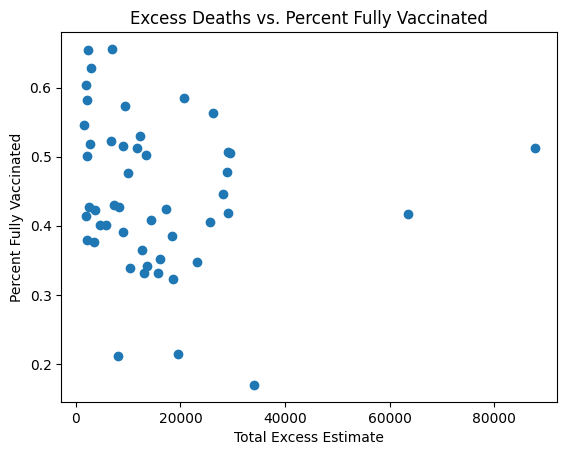

In [7]:
X = ed_vh_combined['Total Excess Estimate']
Y = ed_vh_combined['Percent Fully Vaccinated']
L1 = npy.polyfit(X, Y, 1)
L2 = L1[1] + L1[0] * X
plt.scatter(X, Y)
plt.plot(X, L2, 'r')
plt.title('Excess Deaths vs. Percent Fully Vaccinated')
plt.xlabel('Total Excess Estimate')
plt.ylabel('Percent Fully Vaccinated')
plt.show()
